In [6]:
#importing all necessary libraries
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import seaborn as sns
import numpy as np
from joblib import dump, load


In [11]:
#load dataset
df = pd.read_csv('/home/sonia/Bureau/ransomware_detection/CleanedRansomeWareDataset.csv')

np.random.seed(3)
array = df.values
X = array[:,1:]
y = array[:,0]

#training
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.27, stratify=y)

MLP: 0.117647
RFC: 0.705882
CART: 0.411765
ABC: 0.352941
XGBC: 0.647059
the best model with the train_test_split : RFC
0.7647058823529411
[[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

  Cryptowall       1.00      1.00      1.00         1
  Megacortex       1.00      1.00      1.00         1
        Ryuk       0.00      0.00      0.00         2
      Samsam       1.00      1.00      1.00         1
     bitcoin       1.00      1.00      1.00         1
      cerber       0.50      0.50      0.50         2
 cryptojoker       1.00      1.00      1.00         1
   cryptomix       0.00      0.00      0.00        

/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP: 0.243697 (0.079721)
RFC: 0.722689 (0.060598)
CART: 0.630252 (0.060598)
ABC: 0.361345 (0.037581)
XGBC: 0.680672 (0.053148)


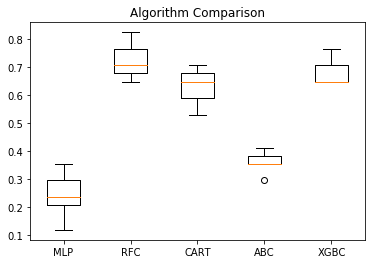

Best model given the best accuracy is: RFC
0.7647058823529411
[[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

  Cryptowall       1.00      1.00      1.00         1
  Megacortex       1.00      1.00      1.00         1
        Ryuk       0.00      0.00      0.00         2
      Samsam       1.00      1.00      1.00         1
     bitcoin       1.00      1.00      1.00         1
      cerber       0.50      0.50      0.50         2
 cryptojoker       1.00      1.00      1.00         1
   cryptomix       0.00      0.00      0.00         1
      crysis       0.60      1.00      0.75         3
      dharma       

/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
#comparison between models

models = []
models.append(('MLP', Perceptron()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('XGBC', XGBClassifier()))

maxim = 0
best_model = []

for name, clf in models:
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print('%s: %f' % (name, accuracy))    
    if(accuracy > maxim):
        maxim = accuracy
        best_model.append((name, clf))

print('the best model with the train_test_split :', best_model[-1][0])
# Selection des algos
model = best_model[-1][1]
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# comparing using cross_validate
maxim = 0
results = []
names = []
best_model = []

for name, model in models:
    kfold = StratifiedShuffleSplit(n_splits=7, test_size=0.27, random_state=3)
    cv_results = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    me = cv_results.mean()
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    if(me > maxim):
        maxim = me
        best_model.append((name, model))

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

print('Best model given the best accuracy is: '+best_model[-1][0])
# Selection des algos
model = best_model[-1][1]
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [9]:
model = RandomForestClassifier()

print('Parameters in use:\n')
pprint(model.get_params())

Parameters in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


Best estimator is: RandomForestClassifier(max_depth=6, min_samples_split=3, n_jobs=-1,
                       oob_score=True, verbose=1)
Best parameters are: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': True, 'verbose': 1}
Best score is: 0.6507936507936508
0.7058823529411765
              precision    recall  f1-score   support

  Cryptowall       1.00      1.00      1.00         1
  Megacortex       1.00      1.00      1.00         1
        Ryuk       0.00      0.00      0.00         2
      Samsam       0.50      1.00      0.67         1
     bitcoin       1.00      1.00      1.00         1
      cerber       0.50      0.50      0.50         2
 cryptojoker       0.00      0.00      0.00         1
   cryptomix       0.00      0.00      0.00         1
      crysis       0.60      1.00      0.75         3
      dharma       1.00      1.00      1.00         1
       locky       1.00      1.00     

/home/sonia/anaconda3/envs/ransomware_detect/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


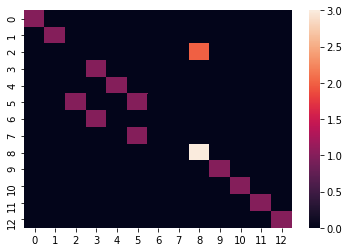

In [10]:
np.random.seed(3)

param_dist = {
    'max_depth': [ 6, 7, 8, 10],
    'max_features': ['auto'],
    'min_samples_leaf': [ 1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [ 20, 100, 200, 300, 400],
    'n_jobs': [-1],
    'oob_score': [True],
    'verbose': [1]
}


skf = StratifiedKFold(n_splits=3, shuffle = True)
clf = GridSearchCV(RandomForestClassifier(), param_dist, n_jobs=-1, cv=skf.split(X_train,y_train), refit=True)
clf.fit(X_train, y_train)

print("Best estimator is: {}".format(clf.best_estimator_))
print("Best parameters are: {}".format(clf.best_params_))
print("Best score is: {}".format(clf.best_score_))

pred = clf.best_estimator_.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test, pred))

sns.heatmap(confusion_matrix(y_test,pred))
plt.show()

In [ ]:
#max_depth
param_range=[i for i in range(1, 40)]

train_scores, test_scores = validation_curve(RandomForestClassifier(n_estimators= 200), X = X_train, y = y_train, param_name = 'max_depth', param_range = param_range, cv = 3, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_scores = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

plt.title("Validation Curve With Random Forest")
plt.xlabel(" the max depth of the tree")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
#min_samples_leaf
param_range=[1, 2, 3, 4, 5, 6, 7, 8]
train_scores, test_scores = validation_curve(RandomForestClassifier(n_estimators = 200, max_depth=8, min_samples_split=3), X = X_train, y = y_train, param_name = 'min_samples_leaf', param_range = param_range, cv = 3, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

plt.title("Validation Curve With Random Forest")
plt.xlabel(" min_samples_leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
#min_samples_split
param_range=[ 1, 2, 3, 4, 5, 6, 7, 8]

train_scores, test_scores = validation_curve(RandomForestClassifier(n_estimators = 200, max_depth=8), X = X_train, y = y_train, param_name = 'min_samples_split', param_range = param_range, cv = 3, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

plt.title("Validation Curve With Random Forest")
plt.xlabel(" min_samples_split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


In [ ]:
#n_estimators
param_range=[1, 10, 20, 100, 150, 200, 300, 350, 500]

train_scores, test_scores = validation_curve(RandomForestClassifier(), X = X_train, y = y_train, param_name = 'n_estimators', param_range = param_range, cv = 3, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
#max_features
param_range=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
#param_range=[i for i in range (1, 131)]

train_scores, test_scores = validation_curve(RandomForestClassifier(n_estimators = 200, max_depth=8, min_samples_split=3, min_samples_leaf=1), X = X_train, y = y_train, param_name = 'max_features', param_range = param_range, cv = 3, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

plt.title("Validation Curve With Random Forest")
plt.xlabel(" max_features")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
clf_grid = RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=20, n_jobs=-1, oob_score=True, verbose=1)
clf_curv = RandomForestClassifier(max_depth=8, max_features='auto', min_samples_leaf=1, min_samples_split=3, n_estimators=200, n_jobs=-1, oob_score=True, verbose=1)

clf_grid.fit(X_train, y_train)
clf_curv.fit(X_train, y_train)

prediG = clf_grid.predict(X_test)
prediC = clf_curv.predict(X_test)

print('accuracy of: '):
print('the model tunned with grid_search: ', accuracy_score(y_test,prediG))
print('the model tunned with validation_curve: ', accuracy_score(y_test,prediC))

if(prediG > prediC):
    model = clf_grid
else:
    model = clf_curv
print('the selected model is: ')
print(model)

In [ ]:
#saving the model
from joblib import dump
model.fit(X, y)
dump(model,"ransomwarePredict.joblib")

In [ ]:
#loading the model
model = load('ransomwarePredict.joblib')

pr = pd.read_csv('/home/sonia/Bureau/ransomware_detection/predict.csv')
X = pr.drop('Family', axis = 1)
y = pr.Family

yPred = model.predict(X)
print(yPred)
print(accuracy_score(y,yPred))